# Housing Price Prediction Project
This notebook walks through the process of predicting housing prices using machine learning. We'll explore the dataset, clean and preprocess the data, train multiple models, and evaluate their performance.

**Author:** Sarthak Nirula 



## 1. Importing Libraries
We'll start by importing all the necessary Python libraries for data analysis, visualization, and machine learning.

# The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset
Here, we load the housing dataset into a Pandas DataFrame and take a quick look at the first few rows.

In [4]:
data = pd.read_csv('BostonHousing.csv')

In [5]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 3. Exploratory Data Analysis (EDA)
In this step, we explore the dataset to understand the data distribution, detect missing values, and identify potential outliers.

In [6]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## 4. Data Preprocessing
We'll clean the dataset by handling missing values, encoding categorical variables, and scaling numerical features.

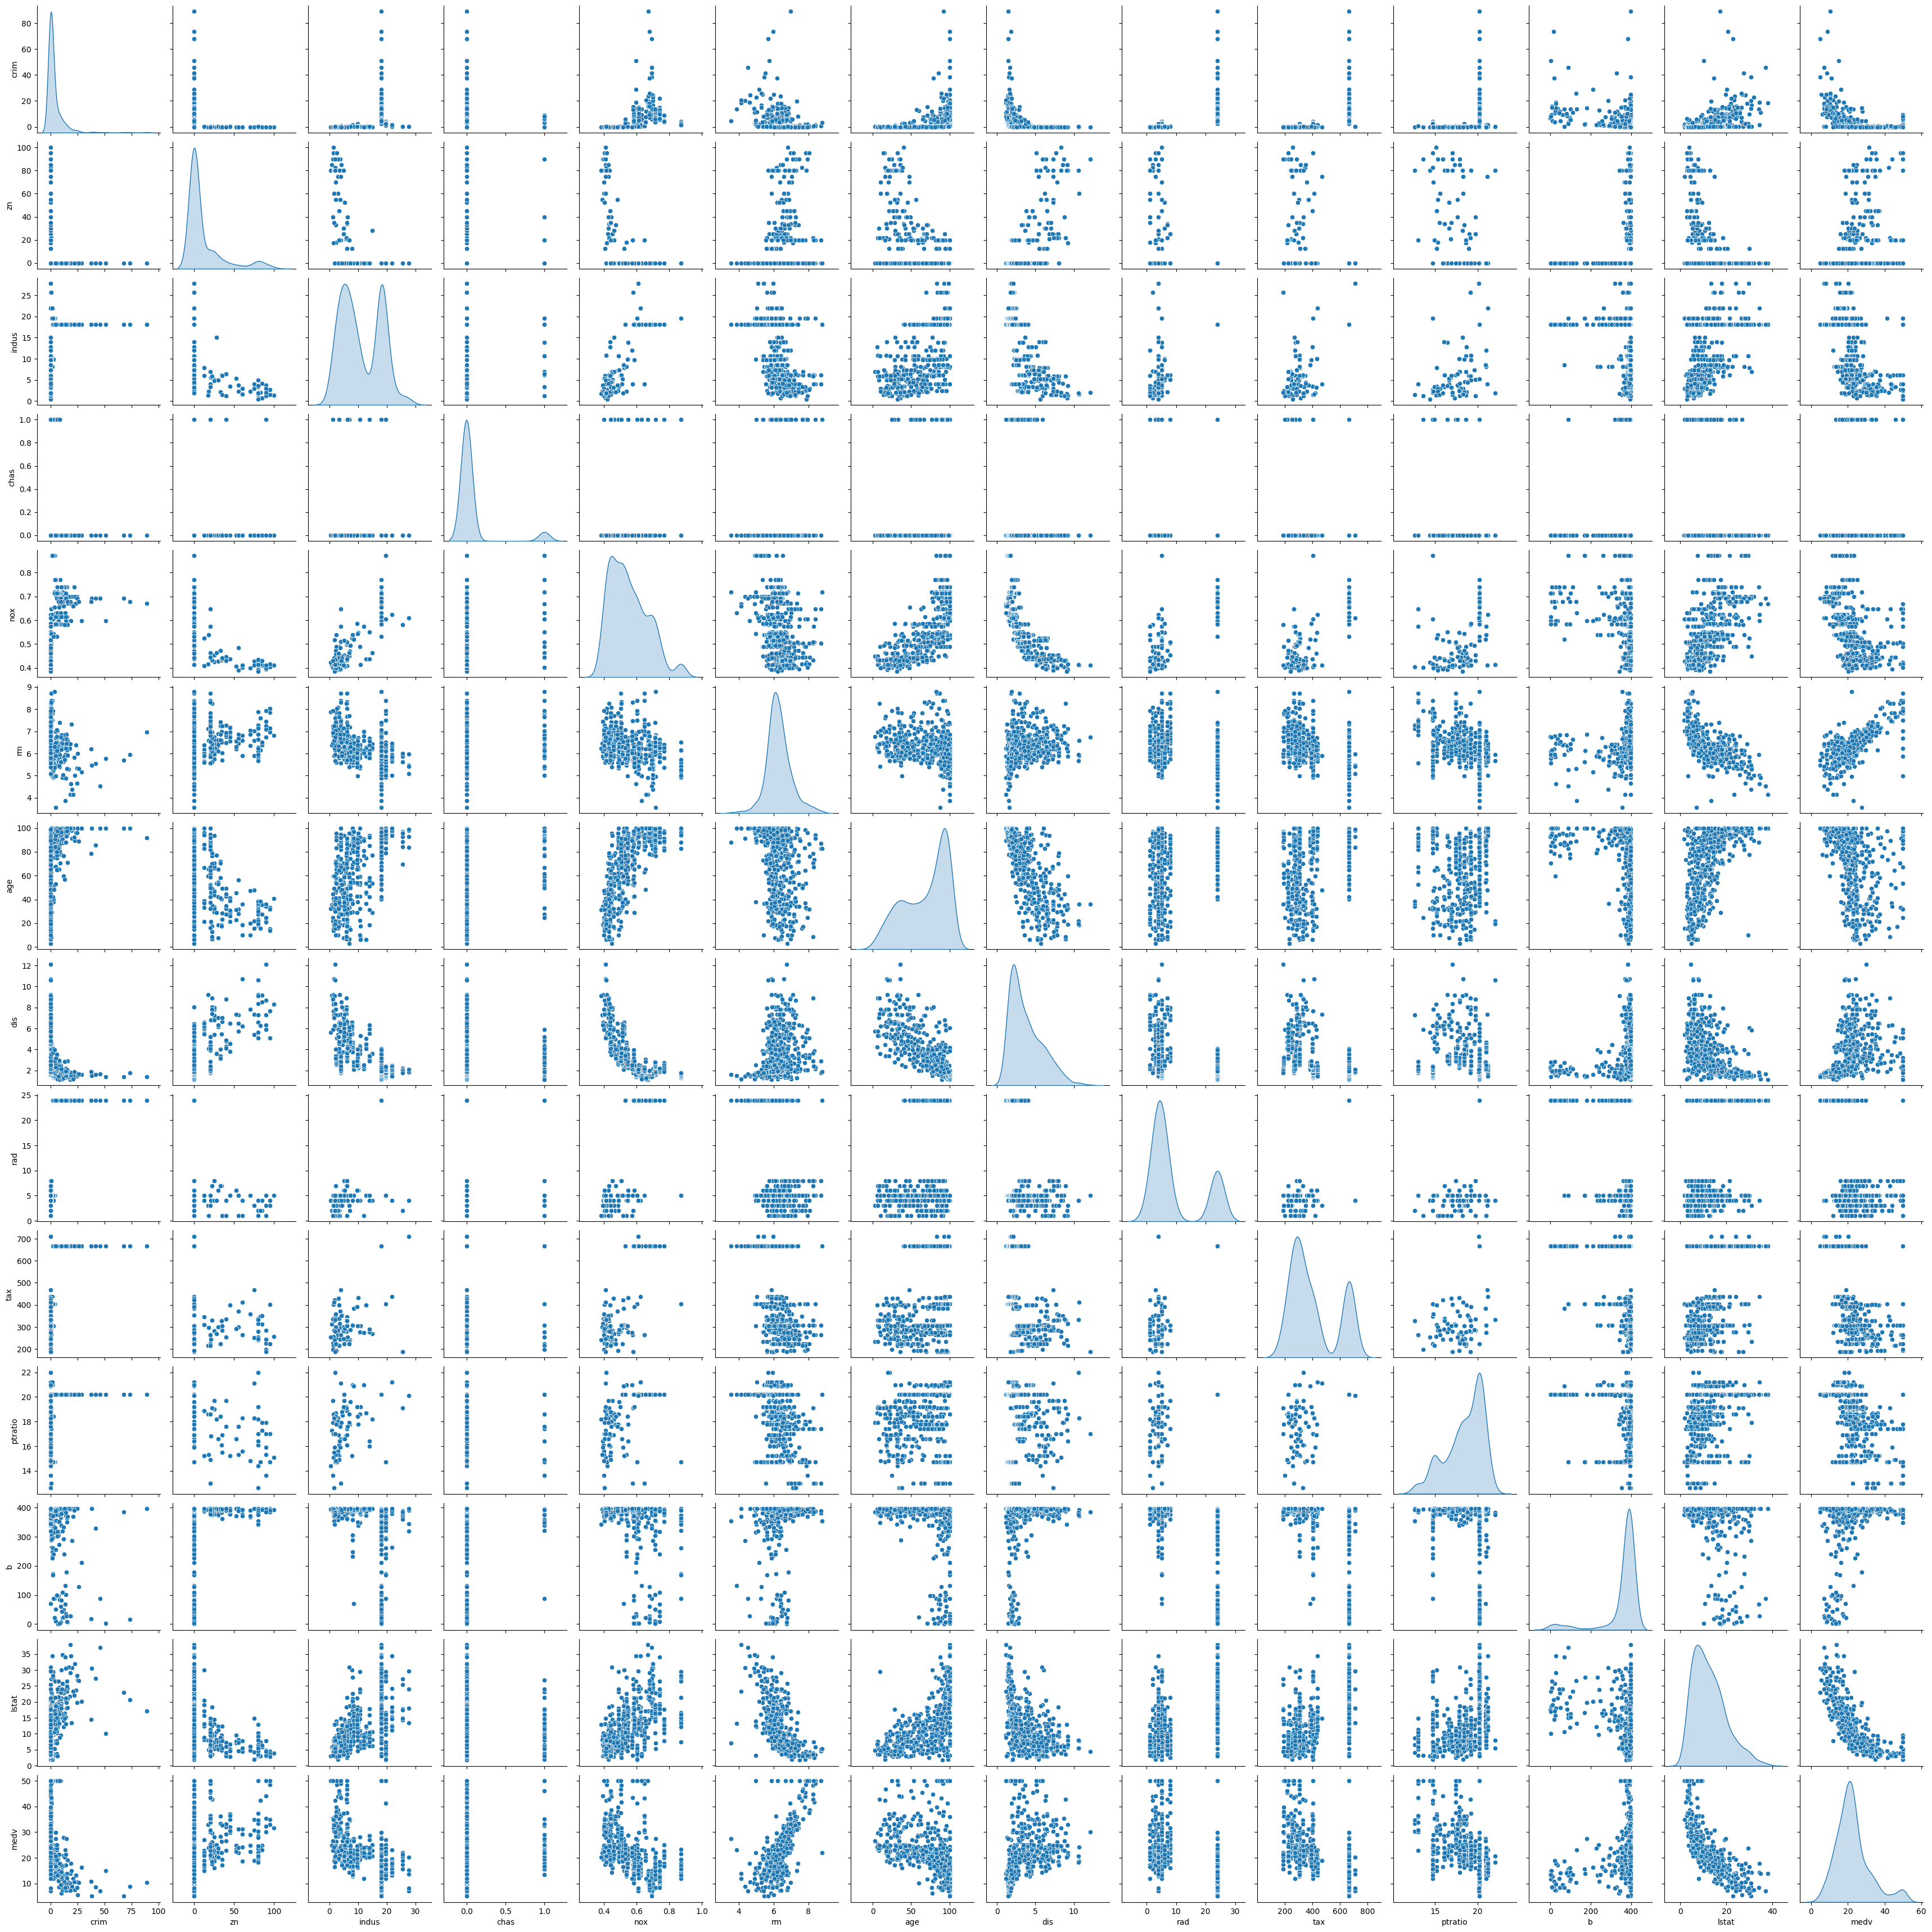

In [ ]:

sns.pairplot(data,diag_kind='kde')

<Axes: >

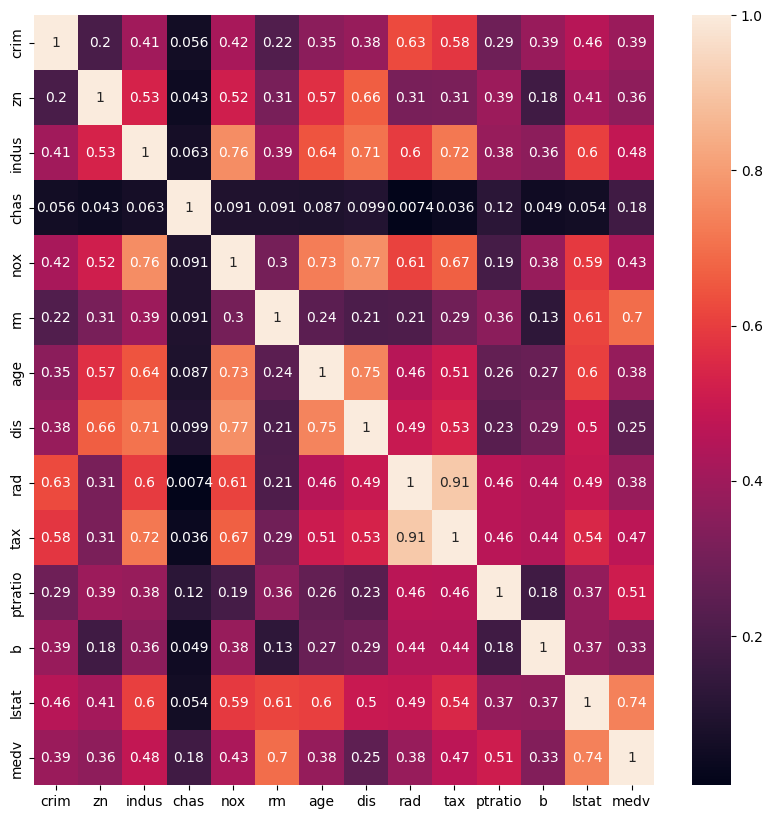

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr().abs(),  annot=True) # shows the correlation values of the data with each feature

In [11]:
X = data.drop(columns = ['medv'], axis = 1).values
y = data['medv'].values 

## 5. Model Training
We train Linear Regression machine learning model to predict housing prices .

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=1)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(x_train,y_train)

print("Training Score: ",clf.score(x_train,y_train))
print("Testing Score: ",clf.score(x_test,y_test))

Training Score:  0.7293585058196337
Testing Score:  0.7634174432138473


## 6. Model Evaluation
We evaluate the trained models using appropriate metrics such as RMSE, MAE, and R² score.

In [16]:
ypred = clf.predict(x_test)

In [ ]:
np.sqrt(np.mean((ypred-y_test)**2)) #RMSE - Root mean square error

np.float64(4.835373458200537)

## 7. Conclusion
A summary of the results and insights obtained from this project.

In [18]:
clf.coef_

array([-1.02670073,  1.35041325,  0.12557673,  0.57522815, -2.28609206,
        2.13083882,  0.12702443, -3.17856741,  2.64730569, -1.87781254,
       -2.14296387,  0.6693739 , -3.92551025])

In [ ]:
np.linalg.inv(x_train.T@x_train)@x_train.T@y_train.reshape((-1,1)) 

array([[-1.02670073],
       [ 1.35041325],
       [ 0.12557673],
       [ 0.57522815],
       [-2.28609206],
       [ 2.13083882],
       [ 0.12702443],
       [-3.17856741],
       [ 2.64730569],
       [-1.87781254],
       [-2.14296387],
       [ 0.6693739 ],
       [-3.92551025]])